In [36]:
import numpy
import pandas
import scipy
import math
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss

In [5]:
data = pandas.read_csv(u'C:\\Users\\Dmi\\Desktop\\MatLab\\Coursera\\Введение в машинное обучение\\Неделя 5\\Задание 2\\gbm-data.csv',
                      header = 0)
# data.head()

In [25]:
data_np = data.values
print data_np.shape

(3751, 1777)


In [15]:
X = data_np[:, 1:]
y = data_np[:, 0]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.8, 
                                                    random_state = 241)

In [69]:
clf = GradientBoostingClassifier(n_estimators = 250, 
                                 verbose = True, 
                                 random_state = 241, 
                                 learning_rate = 0.2)
clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2613           47.06s
         2           1.1715           44.52s
         3           1.1009           44.30s
         4           1.0529           43.36s
         5           1.0130           43.02s
         6           0.9740           42.58s
         7           0.9475           41.80s
         8           0.9197           41.62s
         9           0.8979           41.02s
        10           0.8730           40.51s
        20           0.7207           35.77s
        30           0.6055           33.16s
        40           0.5244           30.61s
        50           0.4501           28.18s
        60           0.3908           26.09s
        70           0.3372           24.31s
        80           0.3009           22.66s
        90           0.2603           21.39s
       100           0.2327           20.17s
       200           0.0835            6.29s


GradientBoostingClassifier(init=None, learning_rate=0.2, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=241, subsample=1.0,
              verbose=True, warm_start=False)

In [73]:
train_score = numpy.empty(len(clf.estimators_))
test_score = numpy.empty(len(clf.estimators_))
for i, x in enumerate(clf.staged_predict_proba(X_train)):
#    print x
#    temp = []
#    for xx in x:
#        temp.append(1. / (1 + math.exp((-1) * xx)))
    train_score[i] = log_loss(y_train, x)
    
for i, x in enumerate(clf.staged_predict_proba(X_test)):
#    temp = []
#    for xx in x:
#        temp.append(1. / (1 + math.exp((-1) * xx)))
    test_score[i] = log_loss(y_test, x)
# print test_score

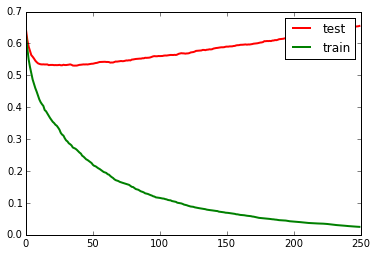

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(test_score, 'r', linewidth = 2)
plt.plot(train_score, 'g', linewidth = 2)
plt.legend(['test', 'train'])

In [78]:
print numpy.argmin(test_score) + 1
print test_score[numpy.argmin(test_score)]
print min(test_score)

37
0.530581065531
0.530581065531


1
1
0.509475769774
181
0.000208576113948
0.5
7
0.377942819611
250
0.00102236807637
0.3
19
0.31577215801
250
0.00688729100145
0.2
37
0.271831278358
250
0.0249061243801
0.1
52
0.324462597511
250
0.0893696241627


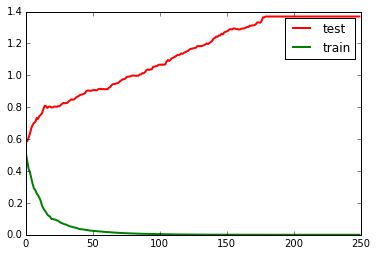

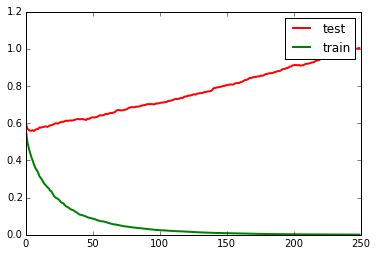

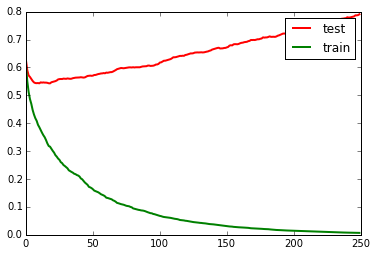

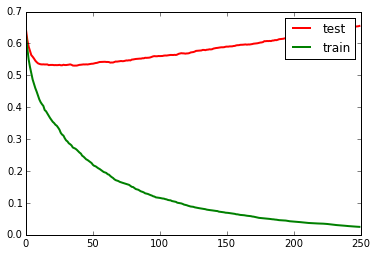

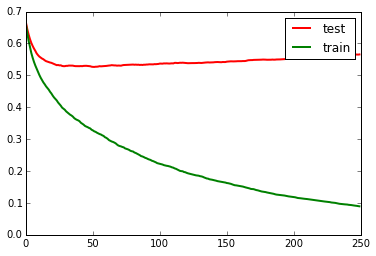

In [67]:
lr = [1, 0.5, 0.3, 0.2, 0.1]
for ll in lr:
    clf = GradientBoostingClassifier(n_estimators = 250, 
                                     # verbose = True, 
                                     random_state = 241, 
                                     learning_rate = ll)
    clf.fit(X_train, y_train)
    train_score = numpy.empty(len(clf.estimators_))
    test_score = numpy.empty(len(clf.estimators_))
    for i, x in enumerate(clf.staged_decision_function(X_train)):
        temp = []
        for xx in x:
            temp.append(1 / (1 + math.exp((-1) * xx)))
        train_score[i] = log_loss(y_train, temp)

    for i, x in enumerate(clf.staged_decision_function(X_test)):
        temp = []
        for xx in x:
            temp.append(1 / (1 + math.exp((-1) * xx)))
        test_score[i] = log_loss(y_test, temp)
    print ll
    print numpy.argmin(test_score) + 1
    print train_score[numpy.argmin(test_score)]
    print numpy.argmin(train_score) + 1
    print train_score[numpy.argmin(train_score)]
    plt.figure()
    plt.plot(test_score, 'r', linewidth = 2)
    plt.plot(train_score, 'g', linewidth = 2)
    plt.legend(['test', 'train'])

In [68]:
clf_rf = RandomForestClassifier(n_estimators = 37, 
                                random_state = 241)
clf_rf.fit(X_train, y_train)
y_proba_rf = clf_rf.predict_proba(X_test)
print log_loss(y_test, y_proba_rf)

0.541094195118
